# PROJETO 2_CIÊNCIA DOS DADOS #

*** 

NOME : Giancarlo Vanoni Ruggiero 

NOME : Maria Eduarda Gonçalves Torres

NOME : Rodrigo Vilela

*** 

In [27]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re 
import numpy
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [28]:
data = 'heart.xlsx'
dados = pd.read_excel( data)
dados.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Legenda do dataset

* **idade -** idade em anos

* **sexo -** sexo ( 1 = masculino; 0 = feminino )

* **cp -** tipo de dor torácica ( 1 = angina típica; 2 = angina atípica; 3 = dor não anginosa; 0 = assintomática )

* **trtbps -** pressão arterial em repouso ( em mm Hg na admissão ao hospital )

* **col -**  colesterol sérico em mg / dl

* **fbs -**  açúcar no sangue em jejum> 120 mg / dl ( 1 = verdadeiro; 0 = falso )

* **restecg -**  resultados eletrocardiográficos em repouso ( 1 = normal; 2 = tendo anormalidade da onda ST-T; 0 = hipertrofia )

* **thalach -**  frequência cardíaca máxima alcançada

* **exang -**  angina induzida por exercício ( 1 = sim; 0 = não )

* **oldpeak -**  depressão de ST induzida por exercícios em relação ao repouso

* **slope -**  a inclinação do segmento ST de pico do exercício ( 2 = inclinação para cima; 1 = plana; 0 = inclinação para baixo )

* **caa -**  número de vasos principais ( 0-3 ) coloridos por fluorosopia

* **thal -**  2 = normal; 1 = defeito corrigido; 3 = defeito reversível

* **output ( target ) -**  o atributo previsto - chance de doença cardíaca ( Valor 0 = menor chance; Valor 1 => maior chance)

### O que vamos analisar?

O objetivo do projeto é explicar / prever se as chances de um paciente ter ataque cardíaco é alta ou baixa, em função de indicadores de doenças cardíacas, que são:

- **Qualitativas**

   - sexo
   - cp
   - fbs
   - restecg
   - exng
   - slope
   - thal


- **Quantitativas**

    - idade 
    - trstbps
    - col
    - thalach
    - oldpeak
    - caa


Os recursos são calculados a partir de análises estatísticas que consistiram na distribuição das variáveis antropométricas segundo os fatores de risco cardiovascular por medidas de frequência e dispersão. Por conta disso, vamos considerar a coluna output como variável dependente ( variável target ) para ser considerada no eixo y. E o resto das colunas como variávies independentes ( variáveis features ) no eixo x.

---

Com o comando `df.isnull().sum() ` certificamos que todas as colunas estão com dados preenchidos. Portanto podemos prosseguir com a análise.

In [29]:
dados.isnull().sum()  

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

O `sns.heatmap()` abaixo vai representa a colinearidade de todas variáveis no conjunto de dados.

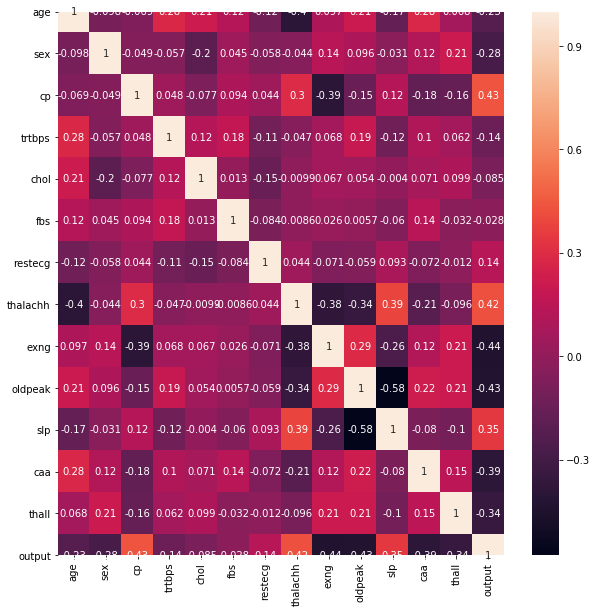

In [30]:
plt.figure(figsize=(10, 10))
sns.heatmap(dados.corr(), annot=True); #annot mostra os coeficientes da matriz
plt.show();

Cada quadrado mostra a correlação entre as variáveis em cada eixo. A correlação varia de -1 a +1. Valores mais próximos de zero significam que não há tendência linear entre as duas variáveis. 

Quanto mais próxima de 1 a correlação é, mais positivamente correlacionados eles são; isto é, à medida que um aumenta, o outro aumenta e quanto mais próximo de 1, mais forte é a relação, de modo que podemos perceber a alta e positiva associação entre a target `output` e as features `slp`,`thalachh` e `cp`. 


Uma correlação mais próxima de -1 é semelhante, mas em vez de aumentar, uma variável diminuirá à medida que a outra aumenta. Portanto conforme explorado, observamos uma forte e negativa dependencia entre a target `output` e as features `exng  `,`oldpeak ` e ` caa `. 

Concluimos então que  as features `slp`,`thalachh` , `cp`, `exng  `,`oldpeak ` e ` caa ` serão as mais relevantes para chegarmos em nossa variável independente. Pois são as que possuem maior correlação com a target.

## Análise exploratória 


A seguir vamos fazer uma analise descritiva das variáveis, conforme o objetivo do projeto. Vamos procurar entender como a variável target ( output ) se comporta cruzada com cada feature. Contudo cada cruzamento irá exigir ferramentas descritivas distintas.


### Análise descritiva  de variáveis <u> quantitativa VS qualitativas( target )</u>

In [31]:
maior_chance=dados.loc[dados['output']==1,:]
menor_chance=dados.loc[dados['output']==0,:]
labels=['Mais Chance', 'Menos Chance']

#### Idade

In [32]:
dados['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.subplot(111)
sns.kdeplot(
   data=dados, x="age", hue="output",
   fill=True, common_norm=False, palette=['#DC143C','#FFA500'],
   alpha=.5, linewidth=0)
plt.title('Densidade de idade dos pacientes com chance de ter ataque cardíaco')
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.legend(labels, title="Chance de ter um ataque cardíaco")
plt.show()

* ( Valor 0 = menor chance; Valor 1 => maior chance)

In [8]:
dados.groupby('output').age.describe()  

,count,mean,std,min,25%,50%,75%,max
output,,,,,,,,
0,138.0,56.601449,7.962082,35.0,52.0,58.0,62.0,77.0
1,165.0,52.496970,9.550651,29.0,44.0,52.0,59.0,76.0


<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Como é possivel analisar no gráfico e na tabela acima, pessoas entre 20 a 50 anos anos tendem a ter uma maior chance de ter ataque cardíaco. Enquanto pessoas de 50 a 70 anos possuem uma menor chance. 

-----------------

#### Pressão arterial

In [9]:
dados['trtbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trtbps, dtype: float64

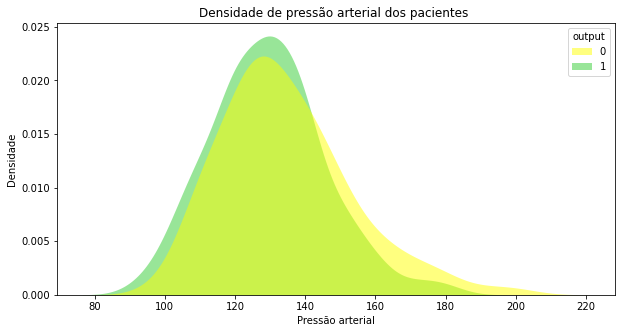

In [66]:
fig = plt.figure(figsize=(10,5))
plt.subplot(111)
sns.kdeplot(
   data=dados, x="trtbps", hue="output",
   fill=True, common_norm=False, palette=['#FFFF00','#32CD32'],
   alpha=.5, linewidth=0
)
plt.title('Densidade de pressão arterial dos pacientes ')
plt.ylabel('Densidade')
plt.xlabel('Pressão arterial')
plt.legend(labels, title="Chance de ter um ataque cardíaco")
plt.show()

* ( Valor 0 = menor chance; Valor 1 => maior chance)

In [11]:
dados.groupby('output').trtbps.describe() 

,count,mean,std,min,25%,50%,75%,max
output,,,,,,,,
0,138.0,134.398551,18.729944,100.0,120.0,130.0,144.75,200.0
1,165.0,129.303030,16.169613,94.0,120.0,130.0,140.00,180.0


<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Quando a pressão arterial comeca a ser maior que 144.75 as chances de ter um ataque comeca a dininuir, entretanto nos 25% e 50% do grafico a pressao se torna irrelevante para podermos assumir qual maior ou menor chance de ter um ataque, ja que as probabilidades sao iguais.

-----------------

#### Colesterol

In [12]:
dados['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

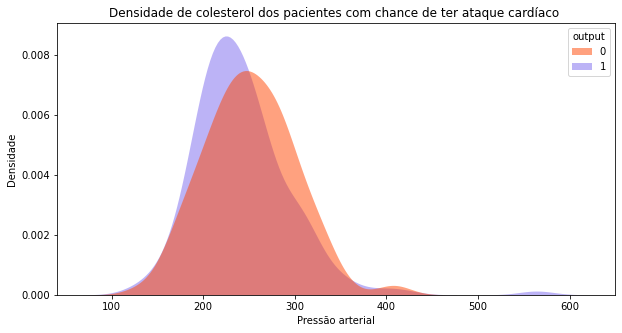

In [68]:
fig = plt.figure(figsize=(10,5))
plt.subplot(111)
sns.kdeplot(
   data=dados, x="chol", hue="output",
   fill=True, common_norm=False, palette=['#FF4500','#7B68EE'],
   alpha=.5, linewidth=0
)
plt.title('Densidade de colesterol dos pacientes com chance de ter ataque cardíaco ')
plt.ylabel('Densidade')
plt.xlabel('Pressão arterial')
plt.legend(labels, title="Chance de ter um ataque cardíaco")
plt.show()

In [14]:
dados.groupby('output').chol.describe()

,count,mean,std,min,25%,50%,75%,max
output,,,,,,,,
0,138.0,251.086957,49.454614,131.0,217.25,249.0,283.0,409.0
1,165.0,242.230303,53.552872,126.0,208.00,234.0,267.0,564.0


* ( Valor 0 = menor chance; Valor 1 => maior chance)

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Quando o colesterol esta entre 217.25 e 283, ou seja, entre 25% e 75% porcento do grafico, as chances de ter um ataque sao menores, contudo a partir de 283 para cima as chances comecam a aumentar. 

-----------------

#### Frequência cardíaca máxima alcançada

In [15]:
dados['thalachh'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalachh, dtype: float64

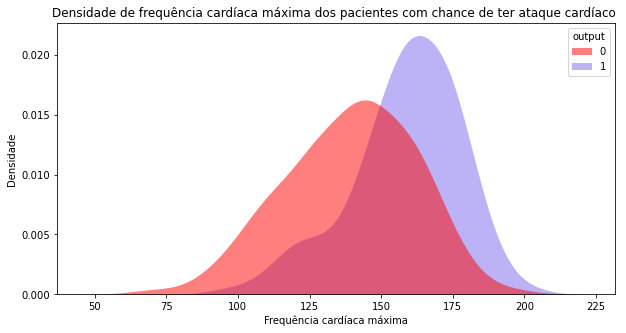

In [71]:
fig = plt.figure(figsize=(10,5))
plt.subplot(111)
sns.kdeplot(
   data=dados, x="thalachh", hue="output",
   fill=True, common_norm=False, palette=['#FF0000','#7B68EE'],
   alpha=.5, linewidth=0
)
plt.title('Densidade de frequência cardíaca máxima dos pacientes com chance de ter ataque cardíaco ')
plt.ylabel('Densidade')
plt.xlabel('Frequência cardíaca máxima')
plt.legend(labels, title="Chance de ter um ataque cardíaco")
plt.show()

* ( Valor 0 = menor chance; Valor 1 => maior chance)

In [17]:
dados.groupby('output').thalachh.describe()

,count,mean,std,min,25%,50%,75%,max
output,,,,,,,,
0,138.0,139.101449,22.598782,71.0,125.0,142.0,156.0,195.0
1,165.0,158.466667,19.174276,96.0,149.0,161.0,172.0,202.0


<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Frequencias cardiacas entre 71 e 140 tendem a dar uma chance menor de uma pessoa ter ataque cardiaco, a partir de mais ou menos 150 para cima, as chanches de ter um ataque comecam a aumentar cada vez mais.

--------

#### Número de vasos principais

In [18]:
dados['caa'].describe()

count    303.000000
mean       0.729373
std        1.022606
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: caa, dtype: float64

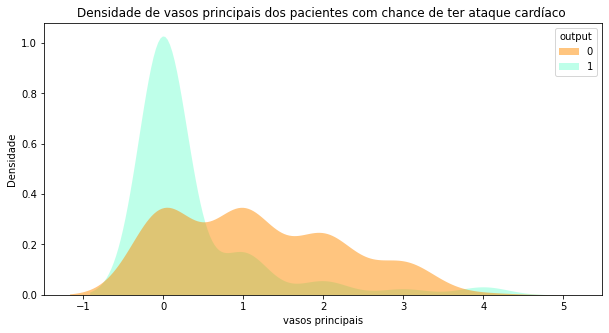

In [96]:
fig = plt.figure(figsize=(10,5))
plt.subplot(111)
sns.kdeplot(
   data=dados, x="caa", hue="output",
   fill=True, common_norm=False, palette=['#FF8C00','#7FFFD4'],
   alpha=.5, linewidth=0
)
plt.title('Densidade de vasos principais dos pacientes com chance de ter ataque cardíaco ')
plt.ylabel('Densidade')
plt.xlabel('Vasos principais')
plt.legend(labels, title="Chance de ter um ataque cardíaco")
plt.show()

* ( Valor 0 = menor chance; Valor 1 => maior chance)

In [20]:
dados.groupby('output').caa.describe()

,count,mean,std,min,25%,50%,75%,max
output,,,,,,,,
0,138.0,1.166667,1.043460,0.0,0.0,1.0,2.0,4.0
1,165.0,0.363636,0.848894,0.0,0.0,0.0,0.0,4.0


<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Pessoas com um numero menor de vasos principais tendem a ter mais chance de ter um ataque cardiaco, enquanto aquelas que possuem entre 1 a 3 vasos tendem a ter uma menor chance.

-----------

#### Old Peak

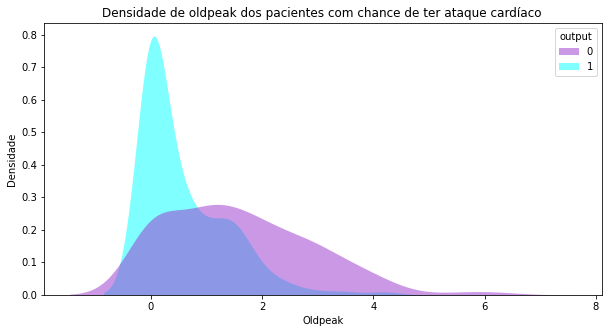

In [97]:
fig = plt.figure(figsize=(10,5))
plt.subplot(111)
sns.kdeplot(
   data=dados, x="oldpeak", hue="output",
   fill=True, common_norm=False, palette=['#9932CC','#00FFFF'],
   alpha=.5, linewidth=0
)
plt.title('Densidade de oldpeak dos pacientes com chance de ter ataque cardíaco ')
plt.ylabel('Densidade')
plt.xlabel('Oldpeak')
plt.legend(labels, title="Chance de ter um ataque cardíaco")
plt.show()

In [22]:
dados.groupby('output').oldpeak.describe()

,count,mean,std,min,25%,50%,75%,max
output,,,,,,,,
0,138.0,1.585507,1.300340,0.0,0.6,1.4,2.5,6.2
1,165.0,0.583030,0.780683,0.0,0.0,0.2,1.0,4.2


<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Pessoas com um oldpeak entre 1.58 tendem a ter uma menor chance de ter ataque cardiaco, enquanto pessoas entre 0.58 tendem a ter as chances elevadas. 

--------------

### Análise descritiva  de variáveis <u> qualitativas VS qualitativa ( target )</u>

#### Sexo

* sexo (1 = masculino; 0 = feminino)
* output (0 = menor chance de ter um ataque cardiaco; 1 = maior chance de ter um ataque cardiaco)

In [4]:
pd.crosstab(dados['output'], dados['sex'],normalize=True,margins=True)

sex,0,1,All
output,,,
0,0.079208,0.376238,0.455446
1,0.237624,0.306931,0.544554
All,0.316832,0.683168,1.000000


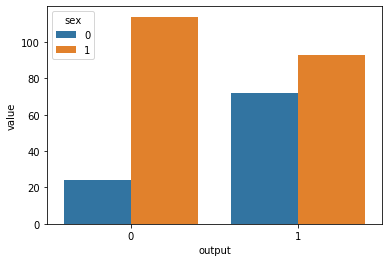

In [10]:
ct = pd.crosstab(dados['output'], dados['sex'])

# now stack and reset
stacked = ct.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
sns.barplot(x=stacked.output, y=stacked.value, hue=stacked.sex);

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Conforme podemos analisar no gráfico, o sexo masculino não apresenta grande correlação de qualquer tipo com a possibilidade de infarto. Contudo, analisando o os valores numéricos podemos concluir que mulheres possuem uma maior possibilidade de infarto. 

----

#### Tipo de dor torácica

* cp (1 = angina típica; 2 = angina atípica; 3 = dor não anginosa; 0 = assintomática)
* output (0 = menor chance de ter um ataque cardiaco; 1 = maior chance de ter um ataque cardiaco)

In [25]:
pd.crosstab(dados['output'], dados['cp'],normalize=True,margins=True)

cp,0,1,2,3,All
output,,,,,
0,0.343234,0.029703,0.059406,0.023102,0.455446
1,0.128713,0.135314,0.227723,0.052805,0.544554
All,0.471947,0.165017,0.287129,0.075908,1.000000


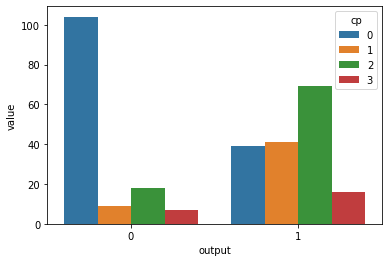

In [26]:
ct_cp = pd.crosstab(dados['output'], dados['cp'])

# now stack and reset
stacked_cp = ct_cp .stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
sns.barplot(x=stacked_cp.output, y=stacked_cp.value, hue=stacked_cp.cp);

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Há primeiramente uma óbvia correlação entre a presença de sintomas e a maior probabilidade de infarto. Mas percebe-se também que para os pacientes maior possibilidade de infarto possuem em geral o sintoma de Angina atípica.

----

#### Açúcar no sangue em jejum

* fbs (1 = verdadeiro; 0 = falso)
* output (0 = menor chance de ter um ataque cardiaco; 1 = maior chance de ter um ataque cardiaco)

In [27]:
pd.crosstab(dados['output'], dados['fbs'],normalize=True,margins=True)

fbs,0,1,All
output,,,
0,0.382838,0.072607,0.455446
1,0.468647,0.075908,0.544554
All,0.851485,0.148515,1.000000


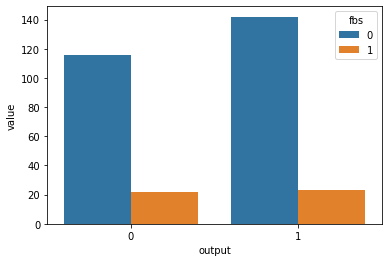

In [28]:
ct_fbs = pd.crosstab(dados['output'], dados['fbs'])

# now stack and reset
stacked_fbs = ct_fbs.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
sns.barplot(x=stacked_fbs.output, y=stacked_fbs.value, hue=stacked_fbs.fbs);

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Aqui parece haver pouquíssima correlação entre e açúcar no sangue durante jejum e a probabilidade de infartos. Indicando que não é um parâmetro prestativo na para nossa pesquisa.

----

#### Resultados eletrocardiográficos em repouso

* restecg (1 = normal; 2 = tendo anormalidade da onda ST-T; 0 = hipertrofia)
* output (0 = menor chance de ter um ataque cardiaco; 1 = maior chance de ter um ataque cardiaco)

In [11]:
pd.crosstab(dados['output'], dados['restecg'],normalize=True,margins=True)

restecg,0,1,2,All
output,,,,
0,0.260726,0.184818,0.009901,0.455446
1,0.224422,0.316832,0.003300,0.544554
All,0.485149,0.501650,0.013201,1.000000


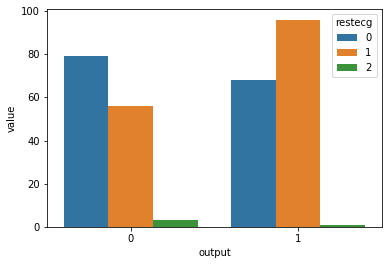

In [12]:
ct_restecg = pd.crosstab(dados['output'], dados['restecg'])

# now stack and reset
stacked_restecg = ct_restecg.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
sns.barplot(x=stacked_restecg.output, y=stacked_restecg.value, hue=stacked_restecg.restecg);

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Pessoas com resultados normais apresentam uma maior possibilidade de infarto. Já para resultados de hipertrofia e e anomalia de onda há um uma correlação negativa com a probabilidade de infarto.

----

#### Angina induzida por exercício 

* exng  (1 = sim; 0 = não)
* output (0 = menor chance de ter um ataque cardiaco; 1 = maior chance de ter um ataque cardiaco)

In [13]:
pd.crosstab(dados['output'], dados['exng'],normalize=True,margins=True)

exng,0,1,All
output,,,
0,0.204620,0.250825,0.455446
1,0.468647,0.075908,0.544554
All,0.673267,0.326733,1.000000


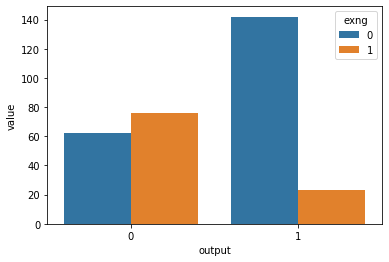

In [14]:
ct_exng = pd.crosstab(dados['output'], dados['exng'])

# now stack and reset
stacked_exng = ct_exng.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
sns.barplot(x=stacked_exng.output, y=stacked_exng.value, hue=stacked_exng.exng);

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Percebe-se uma correlação negativa entre ter a angina induzida por exercício e a chance de infartos. 

----

#### Inclinação do segmento ST de pico do exercício

* slope (2 = inclinação para cima; 1 = plana; 0 = inclinação para baixo)
* output (0 = menor chance de ter um ataque cardiaco; 1 = maior chance de ter um ataque cardiaco)

In [33]:
pd.crosstab(dados['output'], dados['slp'],normalize=True,margins=True)

slp,0,1,2,All
output,,,,
0,0.039604,0.300330,0.115512,0.455446
1,0.029703,0.161716,0.353135,0.544554
All,0.069307,0.462046,0.468647,1.000000


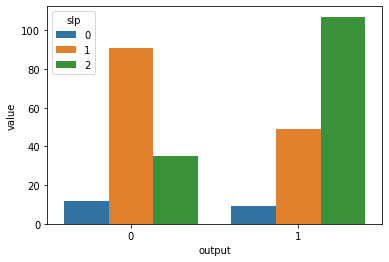

In [34]:
ct_slp = pd.crosstab(dados['output'], dados['slp'])

# now stack and reset
stacked_slp = ct_slp.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
sns.barplot(x=stacked_slp.output, y=stacked_slp.value, hue=stacked_slp.slp);

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

A probabilidade de infarto parece maior conforme há inclinação para cima mostrando uma correlação positiva.

----

#### Talassemia

* thal(- 2 = normal; 1 = defeito corrigido; 3 = defeito reversível)
* output (0 = menor chance de ter um ataque cardiaco; 1 = maior chance de ter um ataque cardiaco)

In [15]:
pd.crosstab(dados['output'], dados['thall'],normalize=True,margins=True)

thall,0,1,2,3,All
output,,,,,
0,0.003300,0.039604,0.118812,0.293729,0.455446
1,0.003300,0.019802,0.429043,0.092409,0.544554
All,0.006601,0.059406,0.547855,0.386139,1.000000


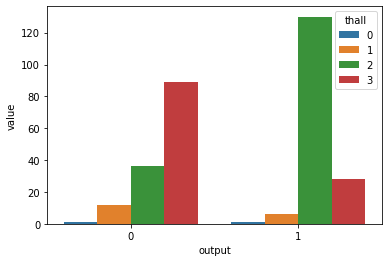

In [16]:
ct_thall = pd.crosstab(dados['output'], dados['thall'])

# now stack and reset
stacked_thall = ct_thall.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
sns.barplot(x=stacked_thall.output, y=stacked_thall.value, hue=stacked_thall.thall);

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Ao que tudo indica, pessoas que pessoas que tiveram defeitos corrigidos ou mesmo irreparáveis diagnosticados possuem menos probabilidade de infarto em relação as que não tiveram nada.

------

## Modelos de Predição

Depois de analisar e entender melhor como as features se relacinam com a target, procede-se às possíveis técnicas que podem ser aplicadas em na base de dados para se obter um bom modelo de predição. 

A seguir a base de dados será separada em base de treino e base de teste, posto que é um ponto fundamental para validar o modelo escolhido.  A base de treino é aquela que, será utilizada para treinar o modelo. Já a base de teste refere-se à amostra de dados que será utilizada para avaliar o desempenho do seu modelo no mundo real.

O `train_test_split` vai separar o dataframe em base de treinamento e de teste.

In [49]:
X = dados.drop('output',1)
Y = dados.output.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### System Vector Machine

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']

score=0

for i in range (len(kernels)):
    svc = SVC(kernel=kernels[i]).fit(X_train,Y_train)
    
    cv_result = cross_val_score(svc, X_train, Y_train, cv=10, scoring="accuracy")
    
    svc.fit(X_train, Y_train)
    
    y_predict=svc.predict(X_test)
    
    score_new=accuracy_score(Y_test, y_predict)

    if score_new >= score:
        score=score_new
        melhor_kernel=kernels[i]

melhor_kernel

C:\Users\rodri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KeyboardInterrupt: 

In [ ]:
svc = SVC(kernel=melhor_kernel).fit(X_train,Y_train)

cv_result = cross_val_score(svc, X_train, Y_train, cv=10, scoring="accuracy")

svc.fit(X_train, Y_train)

y_predict=svc.predict(X_test)

print("O teste de acurácia do SVM é ", 100*accuracy_score(Y_test, y_predict))

#### Matriz de confusão

In [40]:
pd.crosstab(Y_test, y_predict,rownames=['Real'], colnames=['Predito'])

Predito,0,1
Real,,
0,34,8
1,9,49


# ANÁLISE

O SVM trata-se de um sistema que busca uma linha de separação entre duas classes de variáveis analisando os pontos mais próximos desta reta para cada variável. Pode ser feito com mais de duas classes, fazendo esta correlação várias vezes até cada variável ter a sua própria reta com cada uma das demais, como neste caso.
Realizando um modelo pelo método do SVM, foi possível atingir uma acurácia de 83%.

Em seguida há uma matriz de confusão, que consiste em vericar o banco de dados em comparação com os resultados do modelo e ver o número de acertos. As intersecções de 0 com 0 e 1 com 1 correspondem ao número de acertos do modelo, as demais ao número de erros.

-----

### Regressão Logistíca

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [42]:
lr = LogisticRegression(solver='liblinear')

scores = cross_val_score(lr, X_train, Y_train, cv=10, scoring='accuracy')

lr.fit(X_train, Y_train)

y_predict_RL=lr.predict(X_test)

print("O teste de acurácia da Regressão Logistíca é ", 100*accuracy_score(Y_test, y_predict_RL))

O teste de acurácia da Regressão Logistíca é  80.0


In [43]:
dic={'Feature':X_train.columns,"Feature importance":lr.coef_[0]}
dataframe=pd.DataFrame(data=dic)
dataframe.sort_values('Feature importance', ascending=False)

,Feature,Feature importance
2,cp,0.890403
10,slp,0.802053
6,restecg,0.489216
5,fbs,0.132055
0,age,0.022610
7,thalachh,0.018767
4,chol,-0.001033
3,trtbps,-0.007767
9,oldpeak,-0.463741
8,exng,-0.881319


#### Matriz de confusão

In [44]:
pd.crosstab(Y_test,y_predict_RL,rownames=['Real'], colnames=['Predito'])

Predito,0,1
Real,,
0,33,9
1,11,47


# Análise

Muito semelhante ao SVM, a regressão logística também usa este sistema de linhas e a distância entre estas e os pontos como nível de confiança. Mas agora estes pontos não são mais as variáveis, mas a probabilidade relacionada a esta.
Realizando desta maneira, foi atingida uma acurácia de 80%.

Foi implementada a função `dataframe.sort_values('Feature importance', ascending=False)` para  gerar uma tabela tendo em conta a relevância que o modelo atribuiu para cada feature.

Novamente há uma matriz de confusão e os resultados são promissores.

### Decision Tree

In [ ]:
from sklearn import tree
from graphviz import Digraph
import pandas as pd
from sklearn import preprocessing, tree
from dtreeviz.trees import dtreeviz

In [46]:
clf = tree.DecisionTreeClassifier()
clftree = clf.fit(X_train, Y_train)
tree_pred=clftree.predict(X_test)
print("O teste de acurácia da Decision Tree é ", 100*accuracy_score(Y_test,tree_pred))

O teste de acurácia da Decision Tree é  75.0


In [78]:
clftree.feature_importances_

array([0.09355025, 0.01688044, 0.08321   , 0.07745538, 0.01729215,
       0.02964369, 0.        , 0.07638046, 0.04667618, 0.0709775 ,
       0.04738998, 0.28754506, 0.15299891])

In [47]:
dic={'Coluna':X_train.columns,"Feature importance":clftree.feature_importances_}
dataframe=pd.DataFrame(data=dic)
dataframe.sort_values('Feature importance', ascending=False)

,Coluna,Feature importance
11,caa,0.287545
12,thall,0.152999
2,cp,0.093750
0,age,0.093550
7,thalachh,0.085603
9,oldpeak,0.084152
8,exng,0.046676
3,trtbps,0.044518
10,slp,0.044096
5,fbs,0.029644


#### Matriz de confusão

In [48]:
pd.crosstab(Y_test,tree_pred,rownames=['Real'], colnames=['Predito'])

Predito,0,1
Real,,
0,34,8
1,17,41


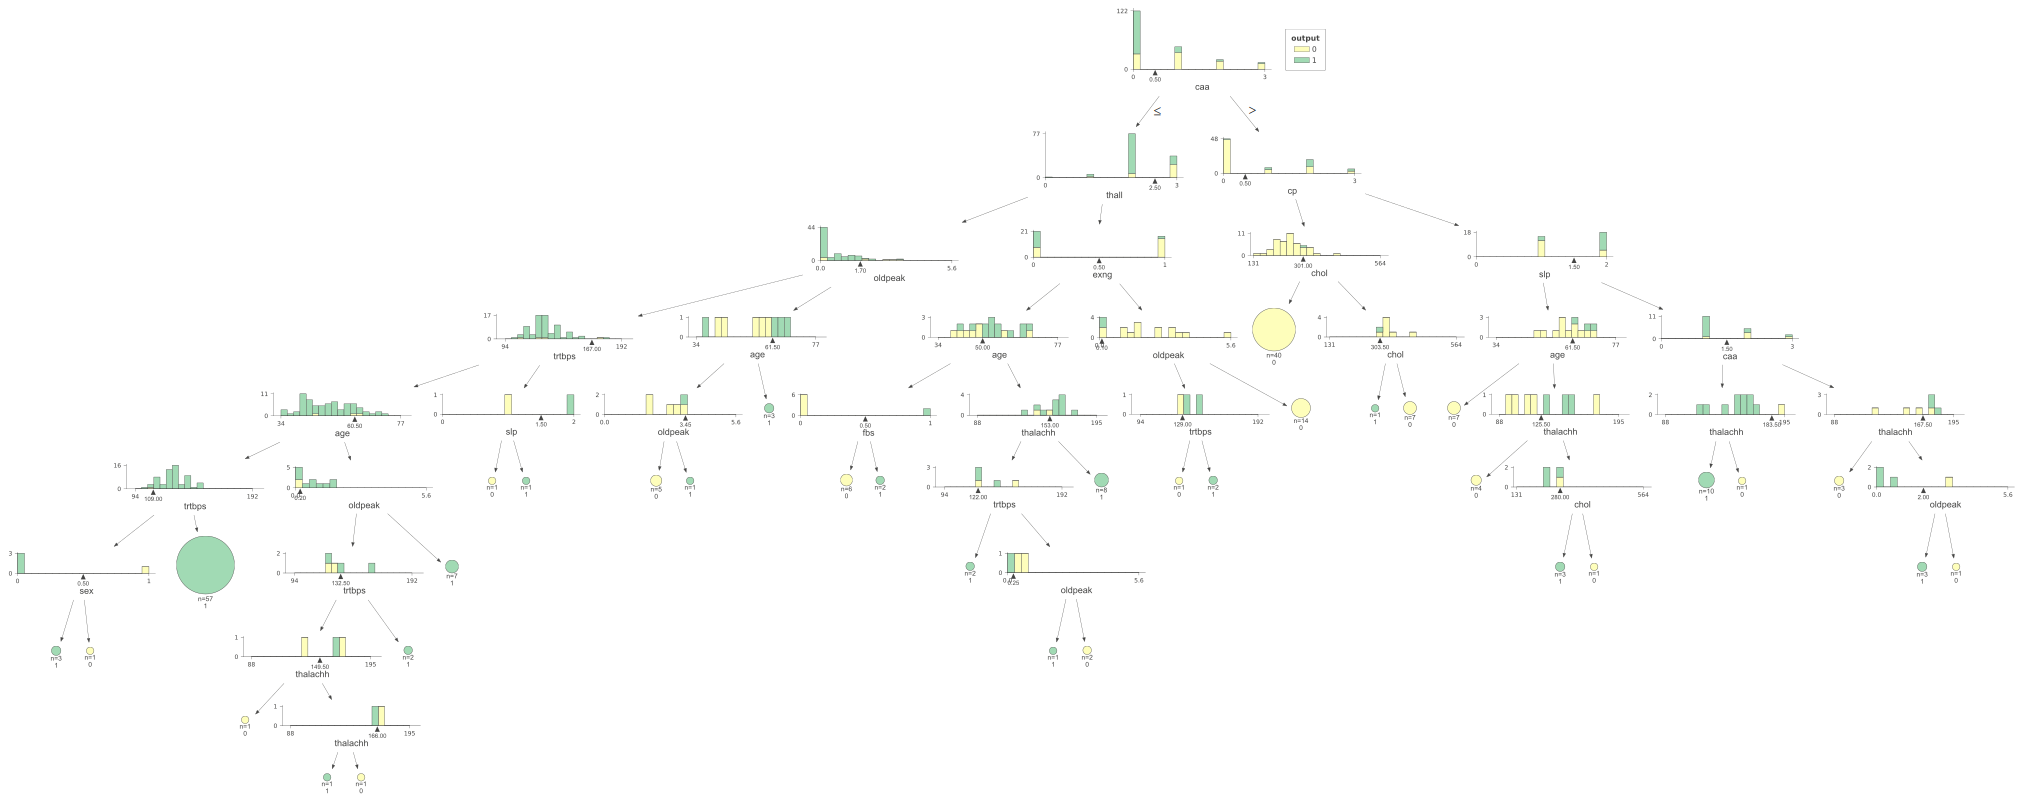

In [48]:
#Para rodar essa célula é preciso ter a biblioteca graphviz instalada, caso dê erro é provável que seja isso
feature_names=list(X_train.columns)

viz = dtreeviz(clf, X_train, Y_train,
                target_name="output",
                feature_names=feature_names,
                class_names=[0,1])
viz

# Análise

Uma árvore de decisão é um mapeamento dos resultados possíveis de uma série de escolhas relacionadas. Eles podem ser usados para discussões informais ou algoritmos de desenho para prever a melhor escolha matematicamente. As árvores de decisão geralmente começam em um único nó e se ramificam para os resultados possíveis. Cada um desses resultados leva a nós adicionais, que se expandem para outras possibilidades. Isso lhe dá uma forma de árvore. Existem três tipos diferentes de nós: nós de probabilidade, nós de decisão e nós finais. Os nós de probabilidade representados por círculos mostram a probabilidade de certos resultados. O nó de decisão representado pelo quadrado representa a decisão a ser tomada e o nó final representa o resultado final do caminho de decisão.
    Utilizando a Árvore de Decisões, foi possível atingir uma acurácia de 75%. Novamente há uma tabela mostrando a relevância de cada feature neste modelo específico e uma matriz de confusão que mostra resultados promissores.

# Conclusão

Ao longo do projeto foi possível avaliar com a análise das features individualmente e como elas se relacionavam a variável target a fim de a predizer. Em seguida foram testados diversos modelos de predição a fim de encontrar o mais eficiente e após  três destes serem testados foi concluido que o SVM foi o mais eficaz e que garantiu um resultado com maior acurácia. Além desta análise, para haver uma  certeza maior, foram selecionadas as variáveis mais relevantes para o modelo e comparadas com os gráficos de cada feature, e estes coincidiram. Mostrando a precisão do modelo.